# Lab03 - Clustering

## Yêu cầu bài tập

**Cách làm bài**


- Bạn sẽ làm trực tiếp trên file notebook này; trong file, từ `TODO` để cho biết những phần mà bạn cần phải làm. **Không được sửa những chỗ không có** `TODO`.

- Bạn có thể thảo luận ý tưởng cũng như tham khảo các tài liệu, nhưng *code và bài làm phải là của bạn*. 

- Nếu vi phạm thì sẽ bị 0 điểm cho bài tập này.

- Trước khi nộp bài, rerun lại notebook (`Kernel` -> `Restart & Run All`) và ấn Ctrl+S để lưu lại.

**Nội dung bài tập**

Trong bài này, bạn sẽ cài đặt 2 thuật toán `k-means` và `k-medois` để gom nhóm dữ liệu. 

## Import thư viện 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Cài đặt thuật toán K-mean

Tính khoảng cách euclid giữa 2 điểm dữ liệu x, y

In [2]:
def euclidianDistance(x, y):
    '''
    Euclidian distance between x, y
    --------
    Return
    d: float
    '''
    #TODO
    return np.linalg.norm(x-y)

In [3]:
class k_means:
    def __init__(self, k=2, thresold = 0.001, max_iter = 300, has_converged=False):
      
        ''' 
        Class constructor
        
        Parameters
        ----------
        - k: number of clusters. 
        - thresold (percentage): stop algorithm when difference between prev cluster 
                                 and new cluster is less than thresold
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''

 
        self.k = k
        self.thresold = thresold
        self.max_iter = max_iter
        self.has_converged= has_converged
        
    def initCentroids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.centroids=[]
        
        #Starting clusters will be random members from X set
        indexes = np.random.randint(0, len(X)-1, self.k)
        self.centroids=X[indexes]
            
        
    def updateCentroids(self, cur_centroids):
        '''
        Class constructor
        
        Parameters
        ----------
        cur_centroids: list of new centroids
        
        '''
        self.has_converged=True
        
        for c in range(0,self.k):
            prev_centroid = self.centroids[c]
            cur_centroid  = cur_centroids[c]
            #checking if % of difference between old position and new position is more than thresold
            
            #TODO d=?
            d = np.mean(prev_centroid != cur_centroid)
            
            if  d > self.thresold:
                self.has_converged = False
                self.centroids = cur_centroids
            
    def fit(self, X):
        '''
        FIT function, used to find clusters
    
        Parameters
        ----------
        X: input data. 
        '''
        #Init list cluster centroids
        self.initCentroids(X)
            
        #Main loop
        for i in range(self.max_iter):  
            #Centroids for this iteration
            cur_centroids = []
            
            for centroid in range(0,self.k):
                #List samples of current cluster
                samples = []
                
                for k in range(len(X)):
                    d_list = []
                    for j in range(self.k):
                        d_list.append(euclidianDistance(self.centroids[j], X[k]))
                    
                    # Cluster has minimal distance between its centroid and data sample
                    # TODO (c=???)
                    c = np.argmin(d_list)
    
                    #Store sample to list
                    if c == centroid:
                        samples.append(X[k])   
                
                #New centroids of each cluster is calculated by mean of all samples closest to it
                
                #TODO (new_centroid=???)
                new_centroid = np.average(samples, axis=0)
            
                cur_centroids.append(new_centroid)
                
            self.updateCentroids(cur_centroids)
            
            if self.has_converged:
                break
        
        #Each cluster represented by its centroid
        return np.array(self.centroids)

    def predict(self, data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            # Create list distances between centroids and data sample
            d_list = []
            for j in range(len(self.centroids)):
                
                # Calculate distances between current data sample and centroid(using euclidian distance) 
                # Store to d_list
                #TODO 
                d_list.append(euclidianDistance(self.centroids[j], data[i]))              
            # Store the Cluster has minimal distance between its centroid and current data sample to pred
            #TODO
            pred.append(np.argmin(d_list))

                
        return np.array(pred)

## Chạy thuật toán 

**Khởi tạo dữ liệu**

Ta tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm có tọa độ (2, 2), (8, 3) và (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cluster có 500 điểm. (Chú ý rằng mỗi điểm dữ liệu là một hàng của ma trận dữ liệu.

In [4]:
np.random.seed(8) # This will fix the randomization; so, you and me will have the same results

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

**Hiển thị dữ liệu trên đồ thị**

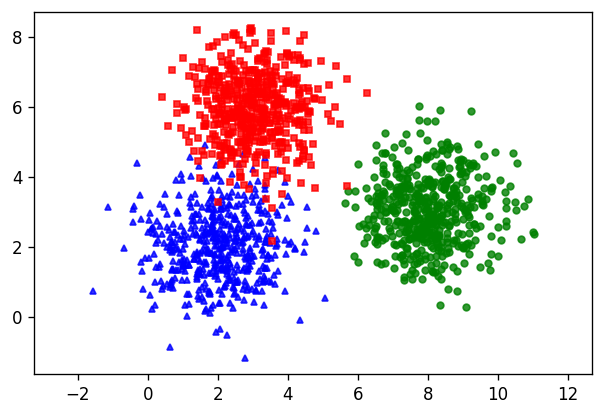

In [5]:
def visualize(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    #you can fix this dpi 
    plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
visualize(X, original_label)

**Gom nhóm dữ liệu bằng thuật toán k-means mà bạn vừa cài đặt**

Centers found by your model:
[[2.01380571 2.02688416]
 [8.02344787 3.061206  ]
 [3.01440769 5.96971345]]


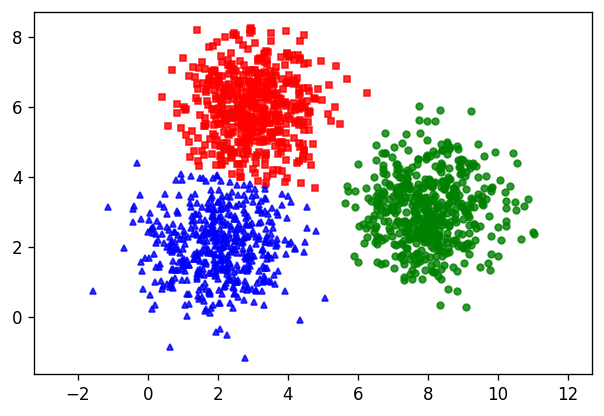

In [6]:
model1=k_means(k=3)
print('Centers found by your model:')
print(model1.fit(X))

pred=model1.predict(X)

visualize(X,pred)


**Thử lại kết quả với scikit learn**

Centers found by scikit-learn:
[[2.01380571 2.02688416]
 [8.02344787 3.061206  ]
 [3.01440769 5.96971345]]


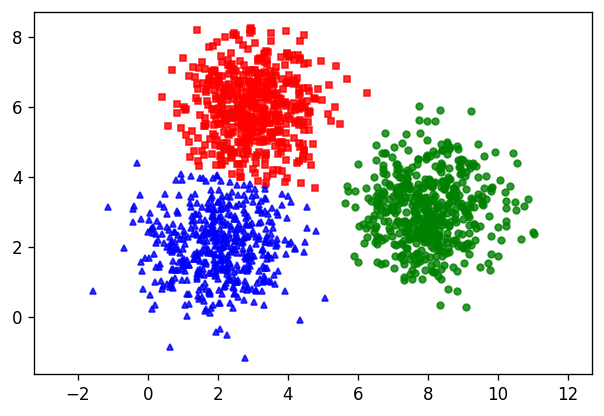

In [7]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model2.cluster_centers_)
pred_label = model2.predict(X)
visualize(X, pred_label)

## 2. Cài đặt thuật toán K-medoids

Các bạn cài đặt và thử nghiệm thuật toán K-medois tương tự như phần 1

In [8]:
#K-medois Implementation
#TODO 
class k_medoids:
    def __init__(self, k = 2, max_iter = 300, has_converged = False):

        self.k = k
        self.max_iter = max_iter
        self.has_converged = has_converged
        self.medoids_cost = []
        
    def initMedoids(self, X):

        self.medoids = []
        
        #Starting medoids will be random members from data set X
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.medoids = X[indexes]
        
        for i in range(0,self.k):
            self.medoids_cost.append(0)
        
    def isConverged(self, new_medoids):

        return set([tuple(x) for x in self.medoids]) == set([tuple(x) for x in new_medoids])
        
    def updateMedoids(self, X, labels):

        self.has_converged = True
        
        #Store data points to the current cluster they belong to
        clusters = []
        for i in range(0,self.k):
            cluster = []
            for j in range(len(X)):
                if (labels[j] == i):
                    cluster.append(X[j])
            clusters.append(cluster)
        
        #Calculate the new medoids
        new_medoids = []
        for i in range(0, self.k):
            new_medoid = self.medoids[i]
            old_medoids_cost = self.medoids_cost[i]
            for j in range(len(clusters[i])):
                
                #Cost of the current data points to be compared with the current optimal cost
                cur_medoids_cost = 0
                for dpoint_index in range(len(clusters[i])):
                    cur_medoids_cost += euclidianDistance(clusters[i][j], clusters[i][dpoint_index])
                
                #If current cost is less than current optimal cost,
                #make the current data point new medoid of the cluster
                if cur_medoids_cost < old_medoids_cost:
                    new_medoid = clusters[i][j]
                    old_medoids_cost = cur_medoids_cost
            
            #Now we have the optimal medoid of the current cluster
            new_medoids.append(new_medoid)
        
        #If not converged yet, accept the new medoids
        if not self.isConverged(new_medoids):
            self.medoids = new_medoids
            self.has_converged = False
    
    def fit(self, X):
        self.initMedoids(X)
        
        for i in range(self.max_iter):
            #Labels for this iteration
            cur_labels = []
            for medoid in range(0,self.k):
                #Dissimilarity cost of the current cluster
                self.medoids_cost[medoid] = 0
                for k in range(len(X)):
                    #Distances from a data point to each of the medoids
                    d_list = []                    
                    for j in range(0,self.k):
                        d_list.append(euclidianDistance(self.medoids[j], X[k]))
                    #Data points' label is the medoid which has minimal distance to it
                    cur_labels.append(d_list.index(min(d_list)))
                    
                    self.medoids_cost[medoid] += min(d_list)
                                
            self.updateMedoids(X, cur_labels)
            
            if self.has_converged:
                break

        return np.array(self.medoids)

        
    def predict(self,data):
    
        pred = []
        for i in range(len(data)):
            #Distances from a data point to each of the medoids
            d_list = []
            for j in range(len(self.medoids)):
                d_list.append(euclidianDistance(self.medoids[j],data[i]))
                
            pred.append(d_list.index(min(d_list)))
            
        return np.array(pred)

# Chạy thuật toán

#### Khởi tạo dữ liệu

Ta tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm có tọa độ (0, 0), (10, 5) và (0, 10), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cluster có 100 điểm. (Chú ý rằng mỗi điểm dữ liệu là một hàng của ma trận dữ liệu.

In [9]:
import pandas as pd

def create_test_dataset(N=100):
    np.random.seed(8)

    means = [[0, 0], [10, 5], [0, 10]]
    cov = [[2, 0], [0, 2]]

    X0 = np.random.multivariate_normal(means[0], cov, N)
    X1 = np.random.multivariate_normal(means[1], cov, N)
    X2 = np.random.multivariate_normal(means[2], cov, N)

    X = np.concatenate((X0, X1, X2), axis = 0)
    K = 3

    original_label = np.asarray([0]*N + [1]*N + [2]*N).T
    
    return (X, original_label)
X, original_label = create_test_dataset(N = 150)

In [10]:
X_df = pd.DataFrame(X, columns = ["atribute_1", "atribute_2"])
labels_df = pd.DataFrame(original_label, columns=['label'])
X_df

,atribute_1,atribute_2
0,0.128983,1.543307
1,-2.753432,-1.960594
2,-3.247730,3.408020
3,2.443529,3.117713
4,1.124056,1.380868
...,...,...
445,1.970032,10.732370
446,0.630625,7.545235
447,0.411150,9.658923
448,-0.717727,8.911716


#### Hiển thị đồ thị

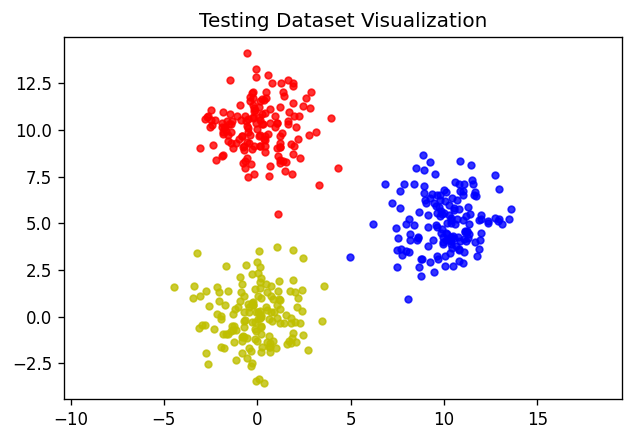

In [11]:
def visualize(X, label, title):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    #you can fix this dpi 
    plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'yo', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'bo', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.title(title)
    plt.plot()
    plt.show()
    
visualize(X, original_label, "Testing Dataset Visualization")

#### Gom nhóm dữ liệu bằng thuật toán k-medoids mà bạn vừa cài đặt

Centers found by your model:
[[ 0.04179804 -0.1047127 ]
 [-0.02244005 10.05882716]
 [10.16598876  5.01139315]]


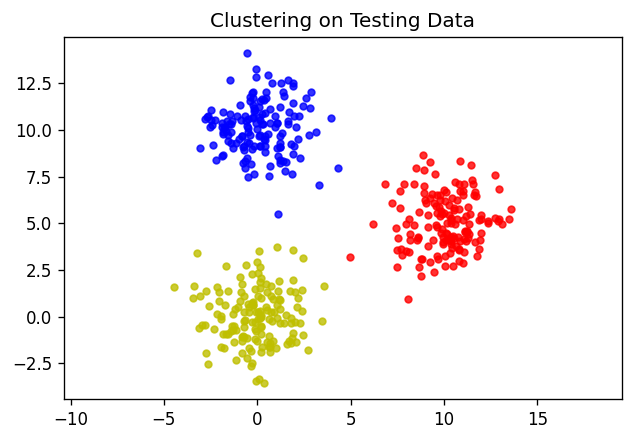

In [12]:
model=k_medoids(k=3, max_iter = 10000)
print('Centers found by your model:')
print(model.fit(X))

pred = model.predict(X)

visualize(X,pred, "Clustering on Testing Data")

**Nêu điểm khác biệt giữa thuật toán K-means và K-medoids:**

TODO: 

   **Khác nhau:**
    - Giải thuật K-means dùng giá trị trung bình của các điểm trong cụm làm trọng tâm.
    - Giải thuật K-medoids thì dùng chính điểm làm trọng tâm
    
   | Yếu tố | K-means | K-medoids|
   | :-: | :-: | :-: |
   | Độ phức tạp | O(ikn) | O(ik $(n-k)^2)$ |
   | Tính hiệu quả | Nhiều hơn | Thấp hơn |
   | Tính thực thi | Dễ dàng cài đặt | Phức tạp |
   | Tính nhạy cảm của dữ liệu | Có | Không |
   | Cụm có hình dạng lồi | Có | Không nhiều |
   | Yêu cầu về số cụm k | Có | Có |
   | Tính tối ưu | Tach được cụm | Tách được cụm, tập dữ liệu nhỏ |


# 3. Sử dụng thuật toán gom cụm trên tập dữ liệu Iris 

In [13]:
from sklearn import datasets
iris = datasets.load_iris()

In [14]:
X = iris.data
y = iris.target

Text(0, 0.5, 'Pepal Width')

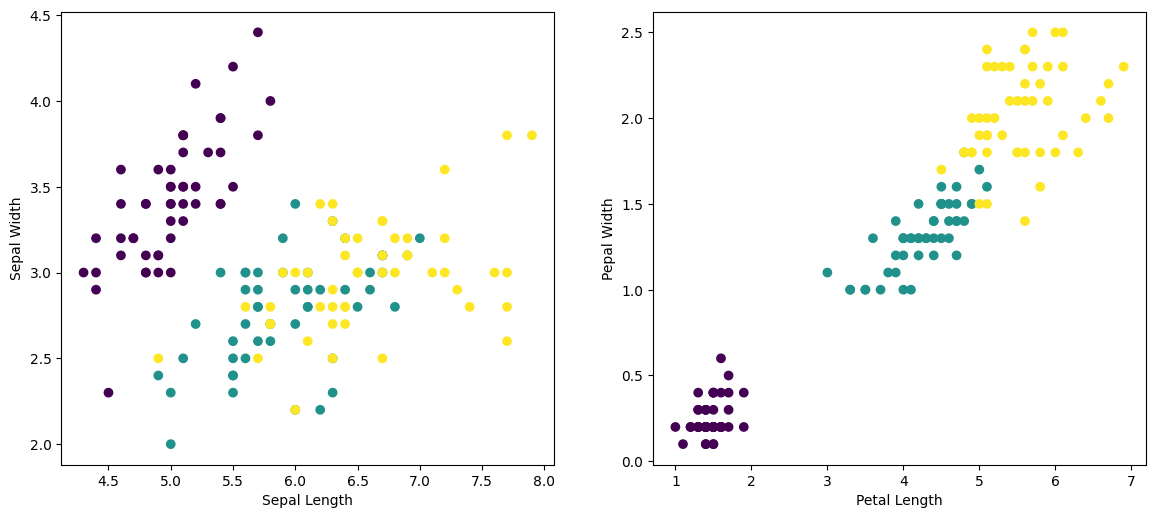

In [15]:
#Visualizing data
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[1].scatter(X[:,2], X[:,3], c=y)
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Pepal Width')

**Nhận xét:**

TODO:
* Đồ thị bên phải phân bố dữ liệu có tính gom cụm nhiều hơn và không rải rác như bên trái, nên sử dụng các phương pháp gom cụm sẽ hiệu quả và ít sai số hơn

In [16]:
D=X[:,2:]
model=k_means(k=3)
centers = model.fit(D)
print(centers)

[[1.462      0.246     ]
 [4.29259259 1.35925926]
 [5.62608696 2.04782609]]


Text(0.5, 1.0, 'Predicted')

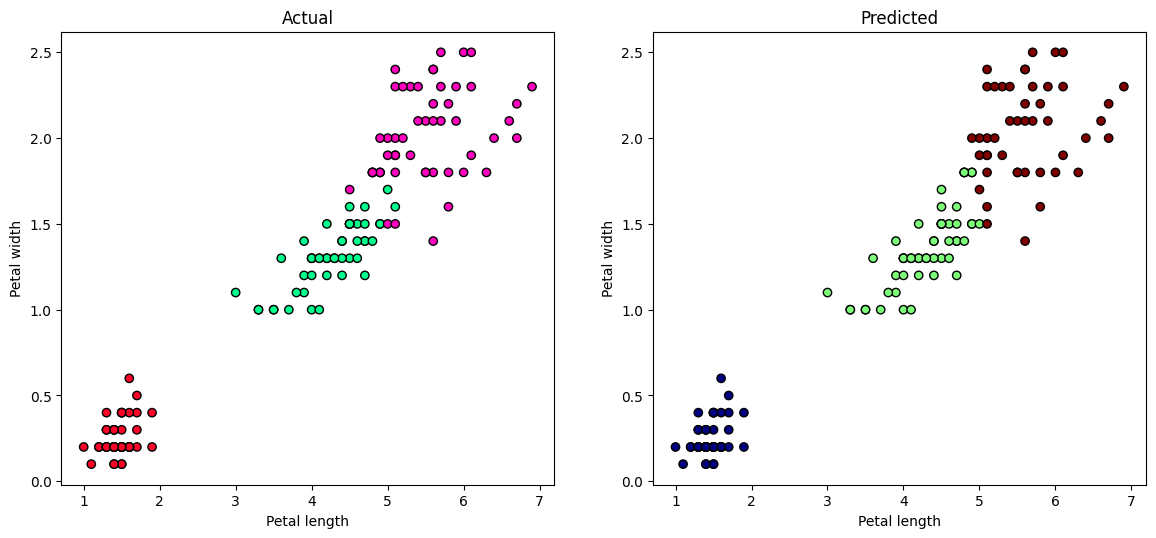

In [17]:
new_labels = model.predict(D)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

**Nhận xét kết quả:**

TODO:
* Sau khi dùng thuật toán K-means, ta thấy phân bố dữ liệu được gom cụm rõ ràng hơn

### Thực hiện tương tự với thuật toán K-medois

In [18]:
D=X[:,2:]
model=k_medoids(k=3)
centers = model.fit(D)
print(centers)

[[5.6 2.1]
 [4.4 1.4]
 [1.4 0.2]]


Text(0.5, 1.0, 'Predicted')

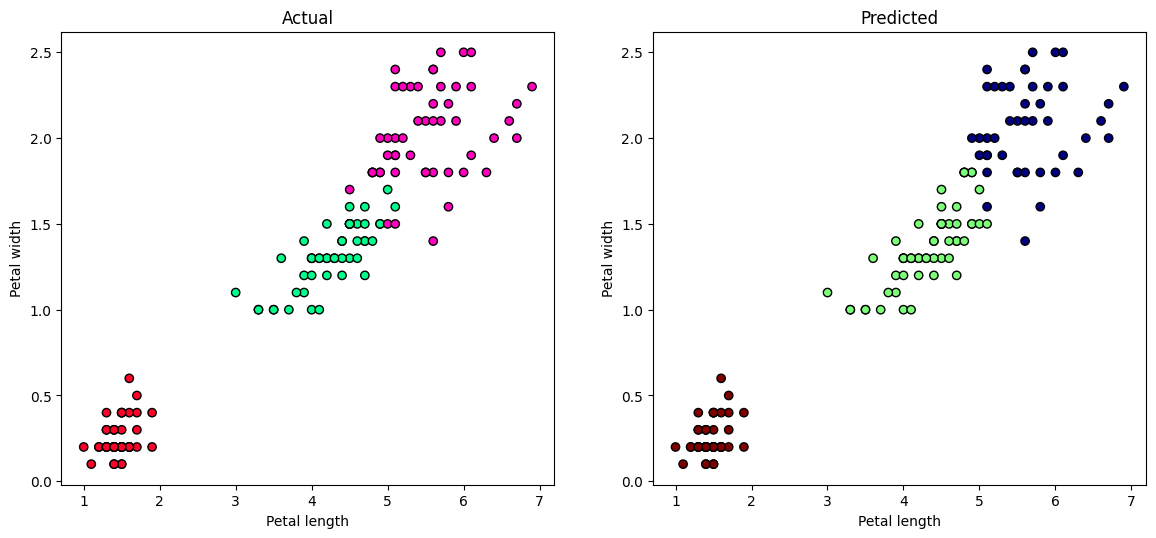

In [19]:
new_labels = model.predict(D)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

#### Nhận xét
* Sau khi dùng thuật toán K-medoids, ta thấy phân bố dữ liệu được gom cụm rõ ràng hơn

#### Điểm mạnh:
    - Hiệu quả với dữ liệu lớn và rộn, độ phức tạp O(ikn), trong đó i là số lần lặp, k là số cụm, n là tổng dữ liệu(k<<n và i<<n)
    - Dễ hiểu và cài đặt
#### Điểm yếu:
    - Chỉ thực thi được khi chọn được số lượng cụm
    - Cụ thể số cụm k
    - Khó phát hiện các cụm có hình dạng phức tạp và nhất là các dạng cụm không lồi 
    - Không thể làm được với dữ liệu nhiễu và mẫu cá biệt 
    - Chỉ có thể áp dụng khi tính được trọng tâm